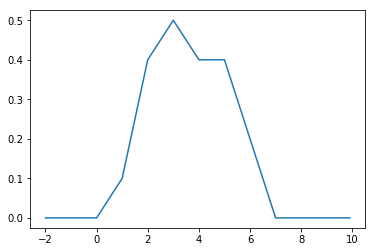

In [36]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-2, 10, 0.1)
y = np.piecewise(x, [x < 0, (x>=0)&(x<1), (x>=1)&(x<2), (x>=2)&(x<3), (x>=3)&(x<=4), (x>4)&(x<=5), (x>5)&(x<=7), x>7], [0, lambda x:0.1*x, lambda x:0.3*x-0.2, lambda x:0.1*x+0.2, lambda x:-0.1*x+0.8, 0.4, lambda x:-0.2*x+1.4, 0])
plt.plot(x, y)
plt.savefig("C:/Onedrive/OneDrive - Knights - University of Central Florida/UCF/Courses/Smart City/HW2/2_1.png")

In [38]:
## Calculate the area under the kernel density function 
from numpy import trapz
area = trapz(y, x)
print("area =", area)

area = 2.0


In [88]:
## Generate 10000 samples from Gaussian distribution
x=np.array(np.random.normal(0,1,10000))
print(x)

[ 1.69365042 -1.24701695  1.76756502 ..., -1.62034137  0.57775135
  1.12652084]


(array([   3.,    4.,    4.,    9.,   21.,   30.,   62.,   80.,  125.,
         164.,  212.,  272.,  354.,  470.,  566.,  629.,  620.,  753.,
         709.,  770.,  711.,  694.,  589.,  495.,  413.,  363.,  255.,
         213.,  141.,   88.,   72.,   45.,   26.,   23.,    6.,    3.,
           2.,    2.,    1.,    1.]),
 array([-3.54139594, -3.35341517, -3.16543441, -2.97745364, -2.78947288,
        -2.60149212, -2.41351135, -2.22553059, -2.03754982, -1.84956906,
        -1.6615883 , -1.47360753, -1.28562677, -1.097646  , -0.90966524,
        -0.72168447, -0.53370371, -0.34572295, -0.15774218,  0.03023858,
         0.21821935,  0.40620011,  0.59418087,  0.78216164,  0.9701424 ,
         1.15812317,  1.34610393,  1.5340847 ,  1.72206546,  1.91004622,
         2.09802699,  2.28600775,  2.47398852,  2.66196928,  2.84995005,
         3.03793081,  3.22591157,  3.41389234,  3.6018731 ,  3.78985387,
         3.97783463]),
 <a list of 40 Patch objects>)

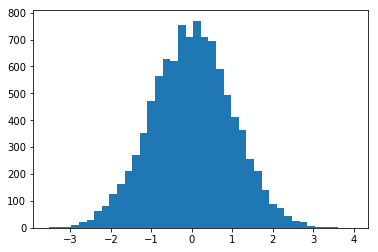

In [72]:
plt.hist(x, bins=40)

In [76]:
x_s=np.arange(-4, 4, 0.01)
print(x_s)

[ -4.00000000e+00  -3.99000000e+00  -3.98000000e+00  -3.97000000e+00
  -3.96000000e+00  -3.95000000e+00  -3.94000000e+00  -3.93000000e+00
  -3.92000000e+00  -3.91000000e+00  -3.90000000e+00  -3.89000000e+00
  -3.88000000e+00  -3.87000000e+00  -3.86000000e+00  -3.85000000e+00
  -3.84000000e+00  -3.83000000e+00  -3.82000000e+00  -3.81000000e+00
  -3.80000000e+00  -3.79000000e+00  -3.78000000e+00  -3.77000000e+00
  -3.76000000e+00  -3.75000000e+00  -3.74000000e+00  -3.73000000e+00
  -3.72000000e+00  -3.71000000e+00  -3.70000000e+00  -3.69000000e+00
  -3.68000000e+00  -3.67000000e+00  -3.66000000e+00  -3.65000000e+00
  -3.64000000e+00  -3.63000000e+00  -3.62000000e+00  -3.61000000e+00
  -3.60000000e+00  -3.59000000e+00  -3.58000000e+00  -3.57000000e+00
  -3.56000000e+00  -3.55000000e+00  -3.54000000e+00  -3.53000000e+00
  -3.52000000e+00  -3.51000000e+00  -3.50000000e+00  -3.49000000e+00
  -3.48000000e+00  -3.47000000e+00  -3.46000000e+00  -3.45000000e+00
  -3.44000000e+00  -3.43000000e+00

In [122]:
## Gaussian kernel
def Gaussian_smooth(x,x_s,r):
    p_g=[]
    for i in range(0,len(x_s)):
        k_list=[]
        for j in range(0,len(x)):
            k=(1 / np.sqrt(2 * np.pi)) * np.exp(-((x_s[i]-x[j])/r) ** 2 / 2)
            k_list.append(k)
        p=(1/10000*r)*sum(k_list)
        p_g.append(p)
    return p_g

area = 0.995408588897


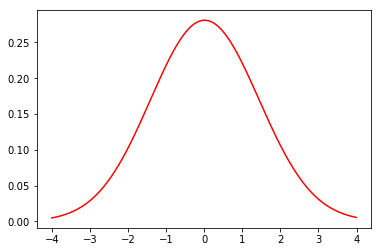

In [128]:
## Call the Gaussian kernel and then plot the estimated kernel density
x=np.array(np.random.normal(0,1,10000))
x_s=np.arange(-4, 4, 0.01)
p_g=Gaussian_smooth(x,x_s,1)

plt.plot(x_s, p_g, color='r')
from numpy import trapz
area = trapz(p_g, x_s)
print("area =", area)

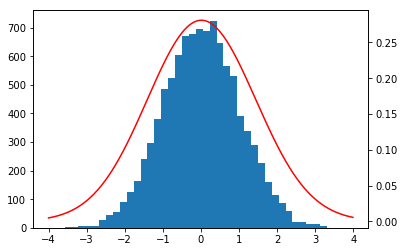

In [145]:
## Overlay the estimated kernel density with the histogram distribution of x
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.hist(x, bins=40)
ax2.plot(x_s, p_g, color='r')
plt.savefig("C:/Onedrive/OneDrive - Knights - University of Central Florida/UCF/Courses/Smart City/HW2/Gaussian_smooth.png")

In [ ]:
## Overlay the estimated kernel density with the histogram distribution of x (r=0.1)
p_g=Gaussian_smooth(x,x_s,r_Gaussian)
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.hist(x, bins=40)
ax2.plot(x_s, p_g, color='r')
plt.savefig("C:/Onedrive/OneDrive - Knights - University of Central Florida/UCF/Courses/Smart City/HW2/Gaussian_smooth_0.1.png")

In [182]:
## Calculate ri for each data points based on Silverman's Rule (c=0.5, k=9)
def r_Gaussian(x,k):
    r_list=[]
    for i in range(0,len(x)):
        dist_list=[]
        for j in range(0,len(x)):
            dist=abs(x[i]-x[j])
            dist_list.append(dist)
        dist_list=np.array(dist_list)
        r=(0.5/k)*sum(dist_list[dist_list.argsort()[:k]])
        r_list.append(r)
    return r_list

In [183]:
## Call Silverman's Rule function to calculate the r for each data points (c=0.5, k=1000)
r_Gaussian=r_Gaussian(x,1000)

In [184]:
## Gaussian kernel estimation considering different r value for all data points
def Gaussian_smooth_R(x,x_s,r_Gaussian):
    p_g=[]
    for i in range(0,len(x_s)):
        k_list=[]
        for j in range(0,len(x)):
            k=(1/r_Gaussian[j])*(1 / np.sqrt(2 * np.pi)) * np.exp(-((x_s[i]-x[j])/r_Gaussian[j]) ** 2 / 2)
            k_list.append(k)
        p=(1/10000)*sum(k_list)
        p_g.append(p)
    return p_g

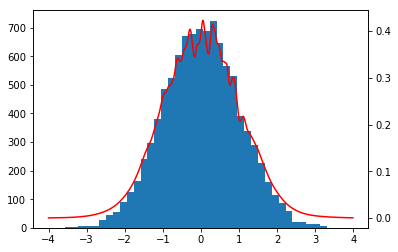

In [185]:
## Overlay the estimated kernel density with the histogram distribution of x 
p_g=Gaussian_smooth_R(x,x_s,r_Gaussian)
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.hist(x, bins=40)
ax2.plot(x_s, p_g, color='r')
plt.savefig("C:/Onedrive/OneDrive - Knights - University of Central Florida/UCF/Courses/Smart City/HW2/Gaussian_smooth_0.1.png")

In [131]:
## Laplace kernel
def Laplace_smooth(x,x_s,r):
    p_l=[]
    for i in range(0,len(x_s)):
        k_list=[]
        for j in range(0,len(x)):
            k=(1/2) * np.exp(-abs((x_s[i]-x[j])/r))
            k_list.append(k)
        p=(1/10000*r)*sum(k_list)
        p_l.append(p)
    return p_l

area = 0.969702126734


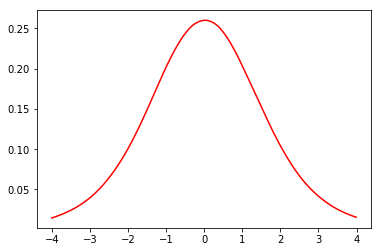

In [142]:
## Call the Laplace kernel and then plot the estimated kernel density
p_l=Laplace_smooth(x,x_s,1)
plt.plot(x_s, p_l, color='r')
from numpy import trapz
area = trapz(p_l, x_s)
print("area =", area)

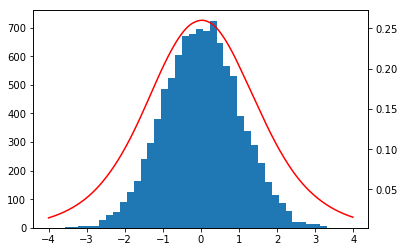

In [146]:
## Overlay the estimated kernel density with the histogram distribution of x
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.hist(x, bins=40)
ax2.plot(x_s, p_l, color='r')
plt.savefig("C:/Onedrive/OneDrive - Knights - University of Central Florida/UCF/Courses/Smart City/HW2/Laplace_smooth.png")

In [190]:
## Laplace kernel estimation considering different r value for all data points
def Laplace_smooth_R(x,x_s,r_Gaussian):
    p_l=[]
    for i in range(0,len(x_s)):
        k_list=[]
        for j in range(0,len(x)):
            k=(1/r_Gaussian[j])*(1/2) * np.exp(-abs((x_s[i]-x[j])/r_Gaussian[j]))
            k_list.append(k)
        p=(1/10000)*sum(k_list)
        p_l.append(p)
    return p_l

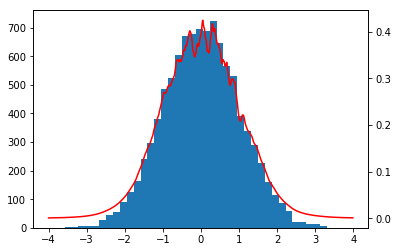

In [191]:
## Overlay the estimated kernel density with the histogram distribution of x
p_l=Laplace_smooth_R(x,x_s,r_Gaussian)
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.hist(x, bins=40)
ax2.plot(x_s, p_l, color='r')
plt.savefig("C:/Onedrive/OneDrive - Knights - University of Central Florida/UCF/Courses/Smart City/HW2/Laplace_smooth.png")

In [134]:
## Epanechnikov kernel
def Epanechnikov_smooth(x,x_s,r):
    p_e=[]
    for i in range(0,len(x_s)):
        k_list=[]
        for j in range(0,len(x)):
            k=(3/4) * max(0,(1-((x_s[i]-x[j])/r)**2))
            k_list.append(k)
        p=(1/10000*r)*sum(k_list)
        p_e.append(p)
    return p_e

area = 0.999878859107


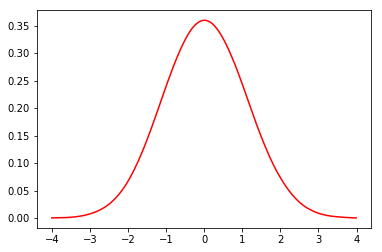

In [135]:
## Call the Epanechnikov kernel and then plot the estimated kernel density
p_e=Epanechnikov_smooth(x,x_s,1)
plt.plot(x_s, p_e, color='r')
from numpy import trapz
area = trapz(p_e, x_s)
print("area =", area)

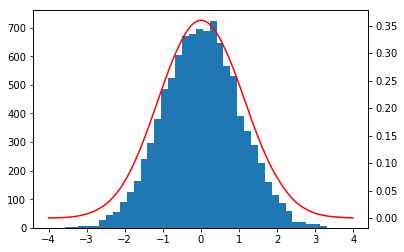

In [147]:
## Overlay the estimated kernel density with the histogram distribution of x
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.hist(x, bins=40)
ax2.plot(x_s, p_e, color='r')
plt.savefig("C:/Onedrive/OneDrive - Knights - University of Central Florida/UCF/Courses/Smart City/HW2/Epanechnikov_smooth.png")

In [192]:
## Epanechnikov kernel estimation considering different r value for all data points
def Epanechnikov_smooth_R(x,x_s,r_Gaussian):
    p_e=[]
    for i in range(0,len(x_s)):
        k_list=[]
        for j in range(0,len(x)):
            k=(1/r_Gaussian[j])*(3/4) * max(0,(1-((x_s[i]-x[j])/r_Gaussian[j])**2))
            k_list.append(k)
        p=(1/10000)*sum(k_list)
        p_e.append(p)
    return p_e

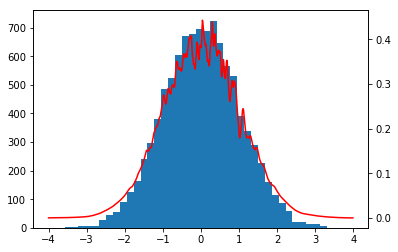

In [193]:
## Overlay the estimated kernel density with the histogram distribution of x
p_e=Epanechnikov_smooth_R(x,x_s,r_Gaussian)
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.hist(x, bins=40)
ax2.plot(x_s, p_e, color='r')
plt.savefig("C:/Onedrive/OneDrive - Knights - University of Central Florida/UCF/Courses/Smart City/HW2/Epanechnikov_smooth.png")